In [1]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scipy.linalg import eigh
import qutip as qt
import sympy as sym

%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})

# Comparison of sqcircuit, numeric and spin-boson models vs truncation

In [4]:
Cc = 0.1
n_eig = 3
# nmax_r_values = np.array([7, 7, 9,  9, 11, 11, 13, 13, 15])
# nmax_f_values = np.array([7, 9, 9, 11, 11, 13, 13, 15, 15])
nmax_r_values = np.array([3, 3, 3, 3, 3])
nmax_f_values = np.array([5, 6, 7, 8, 9])

E_sq = []
E_n  = []

for nmax_r, nmax_f in zip(nmax_r_values, nmax_f_values):
    print(nmax_f)
    
    H_n = sq_ext.hamiltonian_qubit_C_qubit_C_qubit(nmax_r=nmax_r, nmax_f=nmax_f, Cc=Cc, periodic=False)
    E = sq_ext.diag(H_n, n_eig, out='GHz')[0]
    E_n.append(E-E[0])
    del(H_n)
    
    if nmax_f >= 9:
        continue
    else:
        # H_sq = sq_ext.sq_qubit_C_qubit_C_qubit(Cc, nmax_r=nmax_r, nmax_f=nmax_f)
        H_sq = sq_ext.sq_qubit_C_qubit_C_qubit_not_periodic(Cc, nmax_r=nmax_r, nmax_f=nmax_f)
        H_sq.diag(n_eig)
        E_sq.append(H_sq.efreqs-H_sq.efreqs[0])
        del(H_sq)
    
E_sq = np.array(E_sq )
E_n  = np.array(E_n  )

5
6
7
8
9


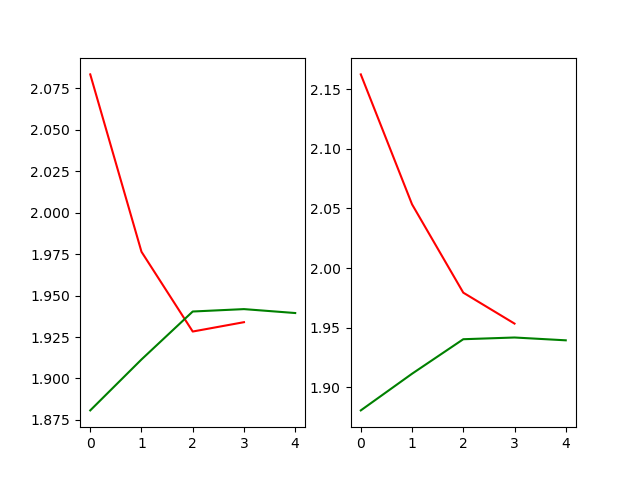

In [5]:
fig, [ax1,ax2] = plt.subplots(ncols=2)

for i, ax in enumerate([ax1,ax2]):
    ax.plot(E_sq[:,i+1], 'r')
    ax.plot(E_n [:,i+1], 'g')

fig.show()

In [11]:
Cc_values = np.geomspace( 1e-3, 1, 10)
n_eig = 3
nmax_r = 4
nmax_f = 12 

E_sq = []
E_n  = []
E_sb = []

for Cc in Cc_values:
    print(Cc)
    
    H_n = sq_ext.hamiltonian_qubit_C_qubit(nmax_r=nmax_r, nmax_f=nmax_f, Cc=Cc)
    E = sq_ext.diag(H_n, n_eig, out='GHz')[0]
    E_n.append(E-E[0])
    del(H_n)

    H_sb = sq_ext.spin_boson_qubit_C_qubit(nmax_r=nmax_r, nmax_f=nmax_f, Cc=Cc)
    E = eigh(H_sb, eigvals_only=True)
    E_sb.append(E-E[0])
    del(H_sb)
    
    H_sq = sq_ext.sq_qubit_C_qubit(Cc, nmax_r=nmax_r, nmax_f=nmax_f)
    H_sq.diag(n_eig)
    E_sq.append(H_sq.efreqs-H_sq.efreqs[0])
    del(H_sq)
    
E_sq = np.array(E_sq )
E_n  = np.array(E_n  )
E_sb = np.array(E_sb )   

0.001
0.0021544346900318843
0.004641588833612777
0.01
0.021544346900318832
0.046415888336127774
0.1
0.21544346900318823
0.46415888336127775
1.0


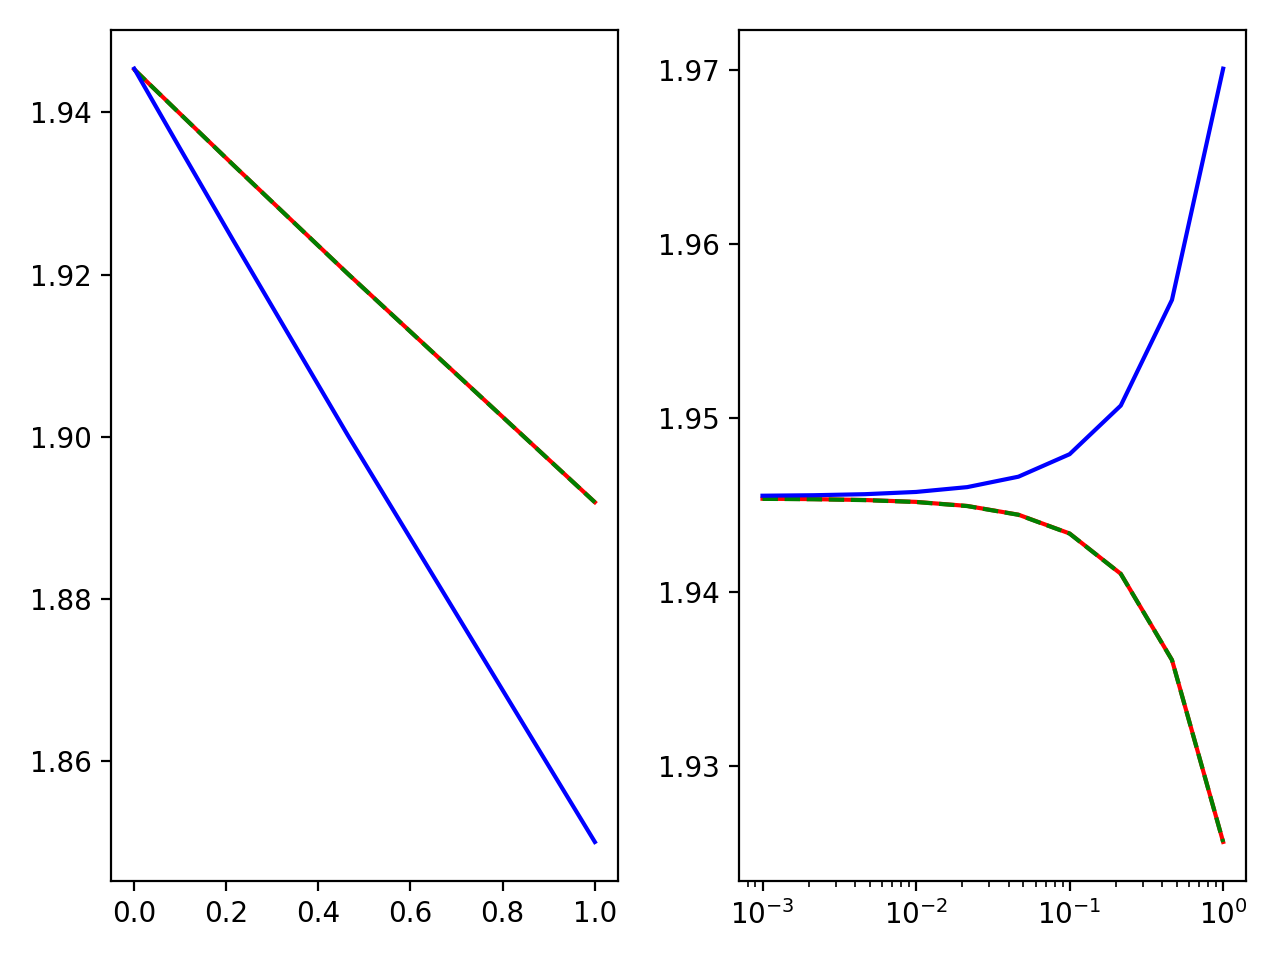

In [20]:
fig, [ax1, ax2] = plt.subplots(ncols=2, dpi =200)

for i, ax in enumerate([ax1, ax2]):
    ax.plot(Cc_values, E_sq[:, i + 1], 'r')
    ax.plot(Cc_values, E_n[:, i + 1], '--g')
    ax.plot(Cc_values, E_sb[:, i + 1], 'b')
    
ax.set_xscale('log')
fig.tight_layout()
fig.show()